# Loading Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [7]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [8]:
print(dataset["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
print(dataset["data"]) # independent variable

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


# Splitting Independent and Dependent Variables

In [2]:
import pandas as pd
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target, columns=["Price"])

In [12]:
X.info() # determine whether to handle missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [13]:
X.describe() # determine whether to do feature scaling

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Splitting Training and Testing Dataset and Feature Scaling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split Training and Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature Scaling
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
X_train.shape

(16512, 8)

# Building Neural Network

## Build Each Layer

In [51]:
from tensorflow.keras.models import Sequential # responsible for the flow
from tensorflow.keras.layers import Dense # responsible for the components

# add layers with .add() function
model = Sequential()

"""
*input_dim:
This specifies the input dimension to the layer, which corresponds to the number of features in X_train.
This argument is only needed for the first layer in the model so that it knows the shape of the input data.

*units:
This specifies that this layer will have how many neurons (or units).

*kernel_initializer:
The kernel_initializer argument determines how the weights of the neurons will be initialized before training starts.

(The "glorot_normal" initializer (also known as Xavier normal initializer) draws the weights
from a truncated normal distribution centered on 0, with stddev = sqrt(2 / (fan_in + fan_out))
where fan_in is the number of input units in the weight tensor and fan_out is the number of output units.)

*activation:
This defines the activation function for the neurons in this layer.
"""

# using formula #2, instance = 20640, alpha = 5
# units formula #2: (sample points nums)/alpha*(last layer units + next layer units)
# the num of neurons does not matter that much => statistic => the weights will fit themselves based on the units
# cuz input layer has no weights, so we delegate hidden layer to do so

# H1 => 1st hidden layer
# input_dim => build input layer by the way => I (input layer)
model.add(Dense(input_dim=X_train.shape[1], units=459, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu")) # H2
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear")) # O (output layer)

In [52]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 459)               4131      
                                                                 
 dense_7 (Dense)             (None, 9)                 4140      
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 8281 (32.35 KB)
Trainable params: 8281 (32.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
print(model.inputs)

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_input')>]


In [19]:
print(model.outputs)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>]


## Compile the NN

In [53]:
# compile the whole NN => to make it executable (give more detail of this model while training)
# you can add more metrics for each epoch
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# Model Training and Calibration

## Model Training

In [54]:
# train (fit)
# split 20% validation set (don't participate in training)
# use the validation set to check if the hyperparameter is OK or not
# use multiple epochs to avoid special validation set result for bias information
# the original epoch: 50 (modify after seeing the result of validation)
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=35)

Epoch 1/35
2642/2642 [==============================] - 22s 7ms/step - loss: 0.4844 - mse: 0.4844 - val_loss: 0.3694 - val_mse: 0.3694
Epoch 2/35
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3674 - mse: 0.3674 - val_loss: 0.3501 - val_mse: 0.3501
Epoch 3/35
2642/2642 [==============================] - 10s 4ms/step - loss: 0.4017 - mse: 0.4017 - val_loss: 0.3063 - val_mse: 0.3063
Epoch 4/35
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3361 - mse: 0.3361 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 5/35
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3237 - mse: 0.3237 - val_loss: 0.3036 - val_mse: 0.3036
Epoch 6/35
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3190 - mse: 0.3190 - val_loss: 0.3025 - val_mse: 0.3025
Epoch 7/35
2642/2642 [==============================] - 11s 4ms/step - loss: 0.3176 - mse: 0.3176 - val_loss: 0.2914 - val_mse: 0.2914
Epoch 8/35
2642/2642 [==============================] -

## Calibration

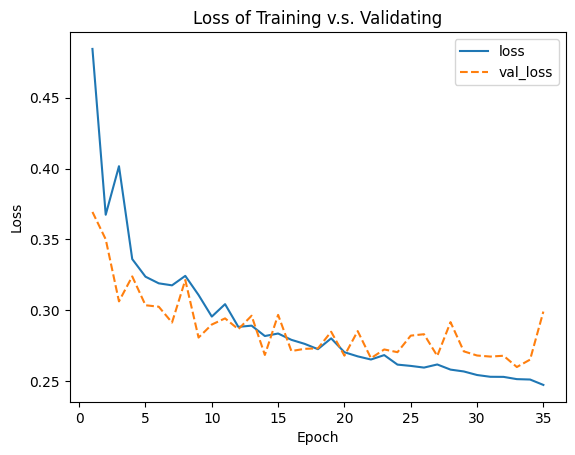

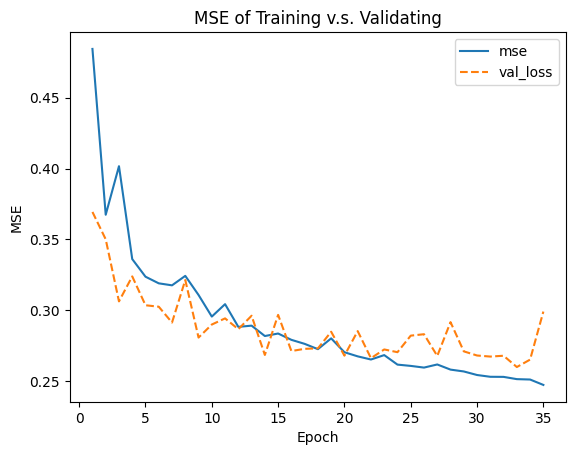

In [55]:
import matplotlib.pyplot as plt

# check if the model is overfit
# modify the epoch nums
# from the epoch 25-30 => starting to split apart => modify epoch from 50 to 25-30

loss = epochs_metrics.history["loss"]
val_loss = epochs_metrics.history["val_loss"]
mse = epochs_metrics.history["mse"]
val_mse = epochs_metrics.history["val_mse"]
epochs = range(1, len(epochs_metrics.history["loss"])+1)

plt.figure(1)
plt.title("Loss of Training v.s. Validating")
plt.plot(epochs, loss, "-")
plt.plot(epochs, val_loss, "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["loss", "val_loss"], loc="best")
plt.show()

plt.figure(2)
plt.title("MSE of Training v.s. Validating")
plt.plot(epochs, mse, "-")
plt.plot(epochs, val_mse, "--")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(["mse", "val_loss"], loc="best")
plt.show()

# Model Inference and Evaluation

## Inference

In [56]:
# predict
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# show the predict result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

129/129 [==============================] - 0s 2ms/step
       Price     Price
14740  1.369  1.589233
10101  2.413  2.736528
20566  2.007  1.477945
2670   0.725  0.839759
15709  4.600  4.507917
...      ...       ...
6655   1.695  1.985966
3505   2.046  2.339413
1919   1.286  1.475790
1450   2.595  2.809175
4148   1.676  2.149501

[4128 rows x 2 columns]


## Evaluation

In [57]:
# evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set: ", test_mse)

129/129 [==============================] - 0s 3ms/step - loss: 0.3165 - mse: 0.3165
Loss of Testing Set: 0.3164699375629425
MSE of Testing Set:  0.3164699375629425
